# Neural Network Implementation for Logistic Regression

Name: Nakul Shinde

# Part 1: Implement Logistic Regression

In this section, a simple logistic regreesion classifier has been built from stratch.This consists of an input layer, a single output layer, and no hidden layer in this classifier.

The algorithm works as follows:

1. Using the np.random.normal() method with a size equal to the number of features, some random initial weights are allocated, while bias is given a random uniform value using np.random.uniform().
2. As this is an implementation of stochastic gradient descent, the np.random.randint() function to select a random input from the dataset.
3. the sigmoid value has been calculated using the formula.

4. the cost value by using given formula has been calculated.

5. Comparison between current cost and previous cost with threshold value to check if convergences is is reached or not.
6. Calculation of the derivative of weights and bais with the help of log_loss

7. A gradient descent step where weights and bias values are changed.


These steps will be repeated until iteration reach the point of convergence or max iteration number . the final weight and bias value are used to make predictions once convergence is achieved.



# References:
1. Lecture notes from Prof. Michael Madden -Topic 03: Fundamentals of Neural Networks, Part 2

In [1]:
#numpy library to perform basic calculations
#matplotlib for plotting cost curve
#pandas to read the input csv file

import numpy as np
from matplotlib import pyplot as py_plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

In [2]:

def accuracy_score(labels, predictions):
    assert len(labels) == len(predictions)
  
    correct = 0
    for label, prediction in zip(labels, predictions):
        if label == prediction:
            correct += 1 
  
    score = correct / len(labels)
    return score


def z_score(dataset):
    scaled_data = (dataset - np.mean(dataset,axis = 0)) / np.std(dataset,axis = 0)
    return scaled_data

def Cost_Value_Graph(Iteration_List,Cost_list): 
        py_plt.title('Costs Curve')
        py_plt.plot(Iteration_List, Cost_list, label = 'Cost value VS.Iteration Value',color ='tab:red')
        py_plt.legend()
        py_plt.ylabel('Cost value')
        py_plt.xlabel('Iteration value')
        py_plt.xticks(Iteration_List)
        py_plt.show() 
 


In [3]:


class Neural_net_logistic():
    
    
    def __init__(self, Total_Iteration = 1000, Learning_Rate = 0.01):
        self.Weight = None
        self.Bias = np.random.uniform(0, 1)
        self.Total_Iteration = Total_Iteration
        self.Learning_Rate = Learning_Rate
        self.Cost_list = []
        self.Iteration_List = []
        

    def sigmoid_function(self,formula):
        result = 1/(1+np.exp(-formula))
        return result
    

    def gradient_descent_function(self, X_Train, y_Train, Total_Iteration, Learning_Rate):
        
        #initially previous cost will be zero
        Previous_Cost = 0
        
        #threshold for comparison
        Threshold_Value = 1e-6
        
        #iterate upto total iterations.
        for Iteration_no in range(Total_Iteration):
            
            #select a random X input
            Random_Row = np.random.randint(X_Train.shape[0])
            
            #calulate aw+b and pass to sigmoid function to get the prob value
            Z_Value = np.dot(X_Train[Random_Row], self.Weight) + self.Bias
            y_hat_Value = self.sigmoid_function(Z_Value)
            
            #cost : -(y*log(y_hat) + (1-y)(1-log(y_hat)))
            Current_cost = -(y_Train[Random_Row] * np.log(y_hat_Value) + (1 - y_Train[Random_Row]) * np.log(1 - y_hat_Value))
            
            #check if convergence is achieved
            if(Threshold_Value > abs(Previous_Cost - Current_cost)):
                Rounded_Cost=round(Current_cost,4)
                print(f'The  Convergence reached at iteration:\t{Iteration_no}')
                print(f'The Cost value for Convergence:\t{Rounded_Cost}')
                break
            
            #store the values for cost curve
            if Iteration_no % 300 == 0:
                self.Iteration_List.append(Iteration_no)
                self.Cost_list.append(Current_cost)
            
            #make current cost as previous for next iteration
            Previous_Cost = Current_cost
            
            # calculating deriavative for weight and bias
            Delta_Weight = (y_hat_Value - y_Train[Random_Row]) * X_Train[Random_Row]
            Delta_Bias = (y_hat_Value - y_Train[Random_Row])
            
            # updating weights and bias
            self.Weight = self.Weight - Learning_Rate * Delta_Weight
            self.Bias = self.Bias - Learning_Rate * Delta_Bias 
        
        return self.Weight, self.Bias  
        

    def fit_function(self, X_Train, y_Train):
        self.Weight=np.random.normal(0,0.01,X_Train.shape[1])
        self.Weight, self.Bias = self.gradient_descent_function(X_Train, y_Train, self.Total_Iteration, self.Learning_Rate) 


   
    def predict_function(self,pred_value):
        
        m=len(pred_value)
        y=np.dot(pred_value ,self.Weight) + self.Bias
        sigmoid_prediction = self.sigmoid_function(y)

        y_pred = [None] * m  
        for i in range(len(sigmoid_prediction)):
            if sigmoid_prediction[i] > 0.5:
                y_pred[i] = 1
            else: 
                y_pred[i] = 0
                
        return y_pred
    
    

# Part 2: Training and Testing the blobs and circles dataset with above classifier

# 1. Training and testing with blobs dataset

1) Using the Pandas library, the data is retrieved and imported into data frames. Both datasets are shown to give a sense of the overall distribution of the dataset.

2) The resulting dataset was split into test and training datasets using sklearn's train test split function. There are two sections to the test set: the test set and the validation set.

3) Because the blobs300 dataset comprises four features, it is hard to display it in two dimensions. An overview of the data distribution can be achieved by using the 4th dimension of the function scatter() as the color of data points. The mplot3d package was used to do this.

In [4]:

np.random.seed(60)
#blob dataframe
Blob_dataframe =pd.read_csv("C:\\Users\\nakul shinde\\Desktop\\Deep_learning_Assignment_01\\blobs300.csv")

#X values by performing z-normalization and y values
Blob_Xvalue = Blob_dataframe[['X1', 'X2','X3','X4']].values
Blob_Xval = z_score(Blob_Xvalue)
Blob_Yval = Blob_dataframe['Class'].values


# Splitting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split
Blob_Xtrain, Blob_Xtest, Blob_Ytrain, Blob_Ytest = train_test_split(Blob_Xval, Blob_Yval, train_size=0.7,shuffle=True)

# dividing the validation data from the training data
Blob_Xtest, Blob_Xvalidation, Blob_Ytest, Blob_Yvalidation = train_test_split(Blob_Xtest, Blob_Ytest, test_size= 0.50, shuffle=True)

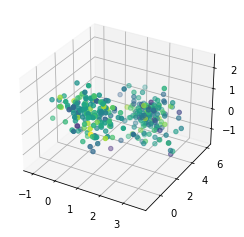

In [5]:

import matplotlib.pyplot as py_plt
import numpy as np

fig = py_plt.figure()
ax = fig.add_subplot(111, projection='3d')

A = Blob_Xvalue[:,0]
B = Blob_Xvalue[:,1]
M = Blob_Xvalue[:,2]
N = Blob_Xvalue[:,3]

img = ax.scatter(A, B, M, c=N)
#fig.colorbar(img)
py_plt.show()

The  Convergence reached at iteration:	2380
The Cost value for Convergence:	0.0012
Accuracy on the Training blob Dataset :  100.0 %
Accuracy on the Validation blob Dataset : 100.0 %
Accuracy on the Test blob Dataset : 100.0 %


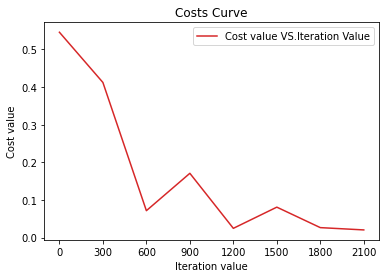

In [6]:

np.random.seed(60)
#call to neural net logistic classifier with number of iterations
logistic_reg=Neural_net_logistic(Total_Iteration=10000)

#calling fit function
logistic_reg.fit_function(Blob_Xtrain, Blob_Ytrain)

#making prediction and calulating accuracy over training dataset
Train_Value=logistic_reg.predict_function(Blob_Xtrain)
Train_Acc = accuracy_score(Blob_Ytrain,Train_Value)
print(f"Accuracy on the Training blob Dataset : ",round((Train_Acc)*100,2),"%")

#making prediction and calulating accuracy over validation dataset
Validation_Value=logistic_reg.predict_function(Blob_Xvalidation)
Validation_Acc = accuracy_score(Blob_Yvalidation,Validation_Value)
print(f"Accuracy on the Validation blob Dataset :",round((Validation_Acc)*100,2),"%")

#making prediction and calulating accuracy over testing dataset
Test_Value= logistic_reg.predict_function(Blob_Xtest)
Test_Acc= accuracy_score(Blob_Ytest,Test_Value)
print(f"Accuracy on the Test blob Dataset :",round((Test_Acc)*100,2),"%") 

Cost_Value_Graph(logistic_reg.Iteration_List,logistic_reg.Cost_list)

# 2.Training and testing with circles dataset

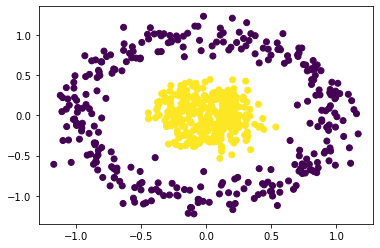

In [7]:

np.random.seed(50)
#circles dataset dataframe
Circles_dataframe =pd.read_csv("C:\\Users\\nakul shinde\\Desktop\\Deep_learning_Assignment_01\\circles600.csv")

#fecting X values and performing z-normalization
Circles_Xvalue = Circles_dataframe[['X1', 'X2']].values
Circles_yval = Circles_dataframe['Class'].values
Circles_Xval = z_score(Circles_Xvalue)


# Splitting the data into train and test using sklearn library as 70%_30%
from sklearn.model_selection import train_test_split
Circles_Xtrain, Circles_Xtest, Circles_ytrain, Circles_ytest = train_test_split(Circles_Xval, Circles_yval, train_size= 0.70,shuffle=True)

# dividing the validation data from the test data 
Circles_Xtest, Circles_Xvalidation, Circles_ytest, Circles_yvalidation = train_test_split(Circles_Xtest, Circles_ytest, test_size= 0.50,shuffle=True)

#Code from Prof.Michel madden
py_plt.scatter(Circles_Xvalue[:,0], Circles_Xvalue[:,1], c=Circles_yval)

Accuracy on the Training circle Dataset : 50.48 %
Accuracy on the Validation circle Dataset : 50.0 %
Accuracy on the Test circle Dataset : 47.78 %


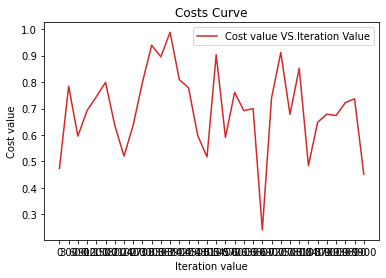

In [8]:

np.random.seed(50)
#call to neural net logistic classifier with number of iterations and learning rate
logistic_reg_circles=Neural_net_logistic(Total_Iteration=10000, Learning_Rate= 0.1)

#call to fit function
logistic_reg_circles.fit_function(Circles_Xtrain, Circles_ytrain)

#making prediction and calulating accuracy over training dataset
Circle_Train_Value=logistic_reg_circles.predict_function(Circles_Xtrain)
Circle_Train_Acc = accuracy_score(Circles_ytrain,Circle_Train_Value)
print(f"Accuracy on the Training circle Dataset :",round((Circle_Train_Acc)*100,2),"%")

#making prediction and calulating accuracy over validation dataset
Circle_Validation_Value=logistic_reg_circles.predict_function(Circles_Xvalidation)
Circle_Validation_Acc = accuracy_score(Circles_yvalidation,Circle_Validation_Value)
print(f"Accuracy on the Validation circle Dataset :" ,round((Circle_Validation_Acc)*100,2),"%")

#making prediction and calulating accuracy over testing dataset
Circle_Test_Value=logistic_reg_circles.predict_function(Circles_Xtest)
Circle_Test_Acc=accuracy_score(Circles_ytest,Circle_Test_Value)
print(f"Accuracy on the Test circle Dataset :",round((Circle_Test_Acc)*100,2),"%")


Cost_Value_Graph(logistic_reg_circles.Iteration_List,logistic_reg_circles.Cost_list)

# 3.Observation:

1) The logistic regressor neural net classifier is trained and tested with two datasets: blobs and circles. The Blob dataset has 300 records, each with four feature values and one class value, while the Circles dataset has 600 entries, each with two feature values and one class value. Both datasets are divided into the following sections: 70% of the data is in the training set, 15 % is in the validation set, and the remaining 15 % is in the testing set.

2) The training, validation, and testing data in the blob dataset are all 100 % accurate. We can see that the blob dataset converges with a cost of 0.0012 at iteration 2380.This means that it is capable of identifying all data correctly. This information can be divided in a linear order. 

3) We get 50.48 % with training data, 50.00 % with validation data, and 47.78 % with testing data using the circles dataset. As there is a fluctuation in the accuracy of the training and test set, we can infer that there is a minor overfitting of data. The decreased accuracy is due to the non-linear separability of the data.

# Part 3: Implement and Test a Shallow Neural Network

We developed a shallow logistic neural network with one input layer, one hidden layer, and one output layer in part 3. The number of neurons in the hidden layer has been set to three, although this number can be changed at any time.


The algorithm works as follows:


1.Using np.random.normal() and np.random.uniform() method we select some random values for weights and bias. As there are 3 neurons selected, the weights associated to hidden layer will be neurons * input_features and bias will be equal to number of neurons. Weights associated to the output layer will be equal to number of neurons and bias will be equal to 1. All these weights and bias are stored in the dictionary.



2.Input values have been selected randomly.



3.Forward pass propagation is then performed by using the following steps:



a.The input data is multiplied by weight values, and bias values have been added.

b.This sum is passed to the sigmoid function to calculate the output and saved in the activation_hiddenlayer variable

c.The multiplication between the activation value of the previous layer and the weight value of the output layer has been performed. and then bias value has been added.

d.This sum is then passed to the sigmoid function to compute y_hat of the output layer.

4.The cost value was computed using the given formula



5.Comparison of current and previous costs with a threshold value to determine whether or not convergence has occurred.



6.Backward pass propagation has been performed where derviatives of weight and bias of each layer are calculated starting from the output layer to the input layer.



7.Finally, gradient descent step is performed where weights and bias values are updated by using the derviates that were calculated earlier.



These steps will be repeated until the point of convergence is reached. once convergence is achieved, the final weight and bias value are stored which are then used to make predictions.



# References:
1. Lecture notes from Prof. Michael Madden -Topic 03: Fundamentals of Neural Networks , Part 2 (week 3 slide 19)
2. https://www.techopedia.com/definition/33264/hidden-layer-neural-networks

In [10]:
class Shallow_neural_net_logistic():
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __init__(self, Learning_Rate=0.1, Total_Iteration=10000):
        #Initialization: pick values of alpha and max_iter
        self.learning_rate = Learning_Rate
        self.Total_Iteration = Total_Iteration

        self.costs = []
        self.iterations = []
        self.Neuron_value = 0
        self.weight_dict={}
        self.bias_dict={}

        self.Shallow_loss_list = []
        self.Shallow_Iteration_List = []
        
       
    def fit_function(self, X_val, Y_val, Neuron_value):
        convergence_val = False 
        Previous_loss = 0
        threshold = 1e-6
        No_of_input = X_val.shape[1]
        
        # Initailize weights and bias for hidden layer nodes and output layer.
        self.weight_dict['weight_hidden'] = np.random.normal(0,0.01, (No_of_input,Neuron_value))
        self.bias_dict['bias_hidden'] = np.random.uniform(0, 1, Neuron_value)
        self.weight_dict['weight_output'] = np.random.normal(0,0.01, (Neuron_value, 1))
        self.bias_dict['bias_output'] = np.random.uniform(0, 1, 1)
        
        
        for i in range(self.Total_Iteration):
            if convergence_val == False:
                #Selecting some random index to be fetched from training dataset for training weights
                random_index = np.random.randint(X_val.shape[0])

                # Fetching the observations of that random index.
                X_row = X_val[random_index].reshape(X_val.shape[1], 1)
                y_row = Y_val[random_index]

               # sum_hiddenlayer,activation_hiddenlayer,sum_outputlayer,activation_outputlayer
                sum_hiddenlayer,activation_hiddenlayer,sum_outputlayer,activation_outputlayer = self.forward_pass_function(X_row,Neuron_value)


                #Calculating the cost function
                Current_loss = -(y_row * np.log(activation_outputlayer).item() + (1 - y_row) * np.log(1 - activation_outputlayer).item())

                #Checking if the difference is under the expected threshold so that the convergence could be checked.
                if abs(float(Current_loss - Previous_loss)) <= threshold:
                        print(f'The  Convergence reached at iteration:\t{i}')
                        print(f'The Cost value for Convergence:\t{Current_loss}')
                        convergence_val = True
                        break

                if i % 1000 == 0:
                        self.Shallow_loss_list.append(Current_loss)
                        self.Shallow_Iteration_List.append(i)

                Previous_loss = Current_loss

                del_hidden_w,del_hidden_b,del_output_weight,del_output_bais = self.backward_pass(sum_hiddenlayer,activation_hiddenlayer,sum_outputlayer,activation_outputlayer,random_index,X_row,y_row)



                #Gradient Descent Stage
                self.weight_dict['weight_hidden'] -= self.learning_rate * del_hidden_w.T
                self.weight_dict['weight_output'] -= self.learning_rate * del_output_weight.T
                self.bias_dict['bias_hidden'] -= self.learning_rate * del_hidden_b
                self.bias_dict['bias_output'] -= self.learning_rate * del_output_bais
 
    def forward_pass_function(self,X_row,Neuron_value):
        
        #Reshaping the bias dictionary for calculation
        self.bias_dict['bias_hidden'] =self.bias_dict['bias_hidden'].reshape(1,Neuron_value)
        #Forward Propagation Step - Input Layer
        sum_hiddenlayer = X_row.T.dot(self.weight_dict['weight_hidden']) + self.bias_dict['bias_hidden']
        activation_hiddenlayer = self.sigmoid(sum_hiddenlayer)
         
            
        #Reshaping the bias dictionary for calculation
        self.bias_dict['bias_output'] =self.bias_dict['bias_output'].reshape(1,1)
        #Forward Propagation Step - Hidden Layer
        sum_outputlayer = activation_hiddenlayer.dot(self.weight_dict['weight_output']) + self.bias_dict['bias_output']
        activation_outputlayer = self.sigmoid(sum_outputlayer)
            
        return sum_hiddenlayer,activation_hiddenlayer,sum_outputlayer,activation_outputlayer

    def backward_pass(self,sum_hiddenlayer,activation_hiddenlayer,sum_outputlayer,activation_outputlayer,random_index,X_row,y_row):
        
        #Backward Propagation Step - Output Layer
        delZ_output = activation_outputlayer - y_row
        delW_output = delZ_output * activation_hiddenlayer
        delB_output = delZ_output
            
            #Backward Propagation Step - Hidden Layer
            
        sigmoid_derivation = self.sigmoid(sum_hiddenlayer).dot((1-self.sigmoid(sum_hiddenlayer)).T)
        
        delZ_hidden = sigmoid_derivation * delZ_output.dot(self.weight_dict['weight_output'].T)
        delW_hidden = delZ_hidden.T.dot(X_row.T)
        delB_hidden = delZ_hidden
        
        return delW_hidden,delB_hidden,delW_output,delB_output
            
            

    def predict_function(self, pred_value):
        
        m=len(pred_value)
        
        weight_sum = np.dot(pred_value ,self.weight_dict['weight_hidden']) + self.bias_dict['bias_hidden']
        hidden_activation = self.sigmoid(weight_sum)
        
        output_w_sum = np.dot(hidden_activation, self.weight_dict['weight_output']) + self.bias_dict['bias_output']
        sigmoid_prediction = self.sigmoid(output_w_sum)
        
        y_pred = [None] * m          
        for i in range(len(sigmoid_prediction)):
            if sigmoid_prediction[i] > 0.5:
                y_pred[i] = 1
            else: 
                y_pred[i] = 0
                
        return y_pred
    
   

The  Convergence reached at iteration:	1467
The Cost value for Convergence:	0.0072593839503650405
Accuracy on the Training blob Dataset :  100.0 %
Accuracy on the Validation blob Dataset : 100.0 %
Accuracy on the Test blob Dataset : 100.0 %


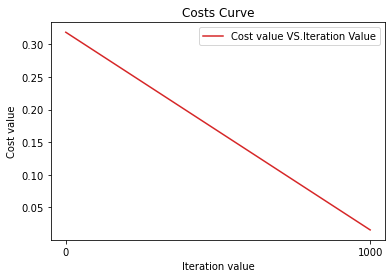

In [11]:

np.random.seed(60)
#call to shallow neural net logistic classifier with number of iterations and learning rate
shallow_lnn = Shallow_neural_net_logistic(Learning_Rate=0.1,Total_Iteration=10000)

#calling fit function with number of neurons
shallow_lnn.fit_function(Blob_Xtrain, Blob_Ytrain, 3)

#making prediction and calulating accuracy over training dataset
Train_Value=shallow_lnn.predict_function(Blob_Xtrain)
Train_Acc = accuracy_score(Blob_Ytrain,Train_Value)
print(f"Accuracy on the Training blob Dataset : ",round((Train_Acc)*100,2),"%")

#making prediction and calulating accuracy over validation dataset
Validation_Value=shallow_lnn.predict_function(Blob_Xvalidation)
Validation_Acc = accuracy_score(Blob_Yvalidation,Validation_Value)
print(f"Accuracy on the Validation blob Dataset :",round((Validation_Acc)*100,2),"%")

#making prediction and calulating accuracy over testing dataset
Test_Value= shallow_lnn.predict_function(Blob_Xtest)
Test_Acc= accuracy_score(Blob_Ytest,Test_Value)
print(f"Accuracy on the Test blob Dataset :",round((Test_Acc)*100,2),"%") 


Cost_Value_Graph(shallow_lnn.Shallow_Iteration_List,shallow_lnn.Shallow_loss_list)

Accuracy on the Training circle Dataset : 73.33 %
Accuracy on the Validation circle Dataset : 72.22 %
Accuracy on the Test circle Dataset : 73.33 %


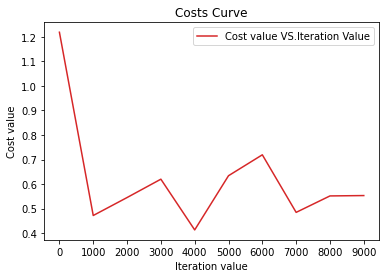

In [12]:

np.random.seed(50)
#call to neural net logistic classifier with number of iterations and learning rate
shallow_lnn_circles=Shallow_neural_net_logistic(Learning_Rate=0.1,Total_Iteration=10000)

#call to fit function
shallow_lnn_circles.fit_function(Circles_Xtrain, Circles_ytrain,3)

#making prediction and calulating accuracy over training dataset
Circle_Train_Value=shallow_lnn_circles.predict_function(Circles_Xtrain)
Circle_Train_Acc = accuracy_score(Circles_ytrain,Circle_Train_Value)
print(f"Accuracy on the Training circle Dataset :",round((Circle_Train_Acc)*100,2),"%")

#making prediction and calulating accuracy over validation dataset
Circle_Validation_Value=shallow_lnn_circles.predict_function(Circles_Xvalidation)
Circle_Validation_Acc = accuracy_score(Circles_yvalidation,Circle_Validation_Value)
print(f"Accuracy on the Validation circle Dataset :" ,round((Circle_Validation_Acc)*100,2),"%")

#making prediction and calulating accuracy over testing dataset
Circle_Test_Value=shallow_lnn_circles.predict_function(Circles_Xtest)
Circle_Test_Acc=accuracy_score(Circles_ytest,Circle_Test_Value)
print(f"Accuracy on the Test circle Dataset :",round((Circle_Test_Acc)*100,2),"%")


Cost_Value_Graph(shallow_lnn_circles.Shallow_Iteration_List,shallow_lnn_circles.Shallow_loss_list)

# Observation

1)The blobs300 dataset was trained and tested on a shallow neural network, and an accuracy of 100 percent was attained in 1467 iterations. The same results were obtained by the normal logistic model after 2380 iterations. So, optimal performance has been achieved with faster processing time

2)In the case of the circles600 dataset, three different accuracies like 73.33%, 72.22%, and 73.33% have been obtained on the train, validation, and test dataset respectively. When these results are compared to the prior one (the simple logistic regression model), it is clear that the accuracy has improved significantly which results in total increase of 23%. Also, there is no overfitting of data in this model.

# Part 4: Challenging task

In this part, task of image recognition using generated model has been performed. The folder 'cifar-10-batches-py' has been downloaded and data has been extracted from batch1. As analysis needs to be performed on a single color. Hence, Red color has been chosen from RGB. classes 'deer' and 'truck' have been extracted and allocated as 0 and 1 for analysis. Finally data has been splitted in Train,Test and Validation set.

In [13]:

#Unload the data present in binary format 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#Fetch the batchname and unload the data
def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

#Load the label names
def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

In [14]:


batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())



data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print(f"\n shape of data in this batch:{data.shape}")

names = loadlabelnames()


#Extraction of only Red color from the given array.As  
#The first 1024 entries contain the red channel values.So, an array of size 10000*1024 has been extracted from the given array.

color_red_data=data[:10000,:1024]

print("The shape of final color is:",color_red_data.shape)

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
size of data in this batch: 10000 , size of labels: 10000

 shape of data in this batch:(10000, 3072)
The shape of final color is: (10000, 1024)


In [15]:

color_red_data_X = []
color_red_data_Y = []


for i in range(len(color_red_data)):
    if labels[i] == 4 or labels[i] == 9:
        color_red_data_X.append(color_red_data[i])


j = 0
while j< len(color_red_data_X):
    
    if(labels[j] == 4):
        color_red_data_Y.append(0)
        j = j + 1
    else:
        color_red_data_Y.append(1)
        j = j + 1
    

#The feature values stored in the color_red_data_X needs normalization.The RGB values are represented in range from 0 to 255
#So, each value will be divided by 255


color_red_data_X_normalized=[]
for number in color_red_data_X:
    color_red_data_X_normalized.append(number / 255)

#Converting both lists into an array format
color_red_data_X_normalized = np.array(color_red_data_X_normalized)
color_red_data_Y = np.array(color_red_data_Y)


In [16]:

np.random.seed(50)
# dividing traing and testing data
Cifar_Xtrain, Cifar_Xtest, Cifar_ytrain, Cifar_ytest= train_test_split(color_red_data_X_normalized, color_red_data_Y, train_size= 0.7, random_state = 0,shuffle=True)


# dividing in training and validation data
Cifar_Xtest, Cifar_Xvalidation, Cifar_ytest, Cifar_yvalidation = train_test_split(Cifar_Xtest, Cifar_ytest, test_size= 0.5, random_state = 0,shuffle=True)

The  Convergence reached at iteration:	7268
The Cost value for Convergence:	0.1165132826247854
Accuracy on the Training Cifar Dataset : 89.83 %
Accuracy on the Validation Cifar Dataset : 86.87 %
Accuracy on the Test Cifar Dataset : 89.23 %


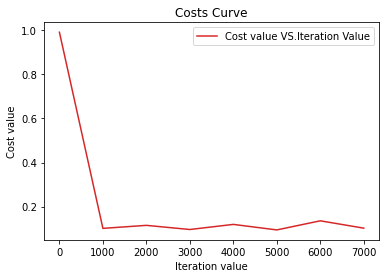

In [17]:

np.random.seed(20)
cifar_var=Shallow_neural_net_logistic(0.01,10000)

#call to fit function
cifar_var.fit_function(Cifar_Xtrain, Cifar_ytrain,3)

#making prediction and calulating accuracy over training dataset
Cifar_Train_Value=cifar_var.predict_function(Cifar_Xtrain)
Cifar_Train_Acc = accuracy_score(Cifar_ytrain,Cifar_Train_Value)
print(f"Accuracy on the Training Cifar Dataset :",round((Cifar_Train_Acc)*100,2),"%")

#making prediction and calulating accuracy over validation dataset
Cifar_Validation_Value=cifar_var.predict_function(Cifar_Xvalidation)
Cifar_Validation_Acc = accuracy_score(Cifar_yvalidation,Cifar_Validation_Value)
print(f"Accuracy on the Validation Cifar Dataset :" ,round((Cifar_Validation_Acc)*100,2),"%")

#making prediction and calulating accuracy over testing dataset
Cifar_Test_Value=cifar_var.predict_function(Cifar_Xtest)
Cifar_Test_Acc=accuracy_score(Cifar_Test_Value,Cifar_ytest)
print(f"Accuracy on the Test Cifar Dataset :",round((Cifar_Test_Acc)*100,2),"%")


Cost_Value_Graph(cifar_var.Shallow_Iteration_List,cifar_var.Shallow_loss_list)

# Observation:

After passing Train,Test and Validation data to the shallow neural network three different accuracies (89.83, 86.87, 89.23) have been obtained in 7268 iterations. The accuracy of test data is slightly less than Train data (by 0.50%) so there is no overfitting of data.

# Part 5: Deep Learning Enhancements -Nakul Shinde (21238848)

In this part, 2 new hidden layers have been added in the existing shallow neural network model. So the total number of hidden layer becomes 3 excluding input and output layer. Apart from this, algorithm Backprop with Momentum has been implementated successfully.

The basic concept of Backprop with Momentum is is that ,rather than having a single predetermined learning rate, each parameter should be able to change at its own rate.The logic for Backprop with Momentum is as follows:

1) Initially for every weight and bias value, a V_delta_weight and V_delta_bias  value respectively.

2) In the first iteration, the derivate values of weight and bias have been allocated to velocity in terms of weight and bias, respectively.


3) After the back propogation step, the values of these terms have been updated by using the given mathematical equations:




In [18]:

class Enhanced_Shallow_nnlogistic():
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __init__(self, learning_rate=0.01, Total_Iteration=10000):
        #Initialization: pick values of alpha and max_iter
        self.learning_rate = learning_rate
        self.Total_Iteration = Total_Iteration

        self.costs = []
        self.iterations = []
        self.h1_neuron = 0
        self.h2_neuron = 0
        self.h3_neuron = 0
        
        self.weight_dict1={}
        self.bias_dict1={}
        self.weight_dict2={}
        self.bias_dict2={}
        self.weight_dict3={}
        self.bias_dict3={}
        self.weight_dict4={}
        self.bias_dict4={}
        
        self.Shallow_loss_list = []
        self.Shallow_Iteration_List = []
        
        #Actual Weight and bias parameters needed for processing the network
        
    def fit_function(self, X, y,h1_neuron,h2_neuron,h3_neuron):
        convergence_val = False
        Previous_loss = 0
        threshold = 1e-6
        No_of_input = X.shape[1]
        
        # Initailize weights and bias for hidden layer nodes and output layer.
        self.weight_dict1['W1'] = np.random.normal(0,0.01, (No_of_input,h1_neuron))
        self.bias_dict1['b1'] = np.random.uniform(0, 1, h1_neuron).reshape(1,h1_neuron)
        
        self.weight_dict2['W2'] = np.random.normal(0,0.01, (h1_neuron, h2_neuron))
        self.bias_dict2['b2'] = np.random.uniform(0, 1, h2_neuron).reshape(1,h2_neuron)
        
        self.weight_dict3['W3'] = np.random.normal(0,0.01, (h2_neuron, h3_neuron))
        self.bias_dict3['b3'] = np.random.uniform(0, 1, h3_neuron).reshape(1,h3_neuron)
        
        self.weight_dict4['W4'] = np.random.normal(0,0.01, (h3_neuron, 1))
        self.bias_dict4['b4'] = np.random.uniform(0, 1, 1).reshape(1,1)
        
        # Initailize delta_V weight and bias values.
        delV_w1 = delV_b1 = delV_w2 = delV_b2 = delV_w3 = delV_b3 = delV_w4 = delV_b4 = 0
        beta = 0.8
        
        #for loop for iteration
        for i in range(self.Total_Iteration):
            if convergence_val == False:
                #Selecting some random index to be fetched from training dataset for training weights
                random_index = np.random.randint(0, X.shape[0]-1)

                # Fetching the observations of that random index.
                X_row = X[random_index].reshape(X.shape[1], 1)
                y_row = y[random_index].item()

                s_h1_layer,a_h1_layer,s_h2_layer,a_h2_layer,s_h3_layer,a_h3_layer,s_h4_layer,a_h4_layer = self.forward_pass(X_row)


                #Calculating the cost function
                Current_loss = -(y_row * np.log(a_h4_layer).item() + (1 - y_row) * np.log(1 - a_h4_layer).item())

                #Checking if the difference is under the expected threshold so that the convergence could be checked.
                if abs(float(Current_loss - Previous_loss)) <= threshold:
                            print(f'The  Convergence reached at iteration:\t{i}')
                            print(f'The Cost value for Convergence:\t{Current_loss}')
                            convergence_val = True
                            break

                if i % 1000 == 0:
                            self.Shallow_loss_list.append(Current_loss)
                            self.Shallow_Iteration_List.append(i)

                Previous_loss = Current_loss
                
                del_w1,del_b1,del_w2,del_b2,del_w3,del_b3,del_w4,del_b4 = self.backward_pass(s_h1_layer,a_h1_layer,s_h2_layer,s_h2_layer,s_h3_layer,a_h3_layer,s_h4_layer,a_h4_layer,random_index,X_row,y_row)
                   
                 #Call to the function back prop momentum    
                delV_w1,delV_b1,delV_w2,delV_b2,delV_w3,delV_b3,delV_w4,delV_b4 = self.back_prop_momentum(del_w1,del_b1,del_w2,del_b2,del_w3,del_b3,del_w4,del_b4,beta,i,delV_w1,delV_b1,delV_w2,delV_b2,delV_w3,delV_b3,delV_w4,delV_b4)


                #Gradient Descent Stage
                self.weight_dict1['W1'] -= self.learning_rate * delV_w1.T
                self.weight_dict2['W2'] -= self.learning_rate * delV_w2.T
                self.weight_dict3['W3'] -= self.learning_rate * delV_w3.T
                self.weight_dict4['W4'] -= self.learning_rate * delV_w4.T

                self.bias_dict1['b1'] -= self.learning_rate * delV_b1
                self.bias_dict2['b2'] -= self.learning_rate * delV_b2
                self.bias_dict3['b3'] -= self.learning_rate * delV_b3
                self.bias_dict4['b4'] -= self.learning_rate * delV_b4                

    def forward_pass(self,X_row):
        
        #Forward Propagation Step - Hidden layer 1
        s_h1_layer = X_row.T.dot(self.weight_dict1['W1']) + self.bias_dict1['b1']
        a_h1_layer = self.sigmoid(s_h1_layer)
            
        #hidden layer 2
        s_h2_layer = a_h1_layer.dot(self.weight_dict2['W2']) + self.bias_dict2['b2']
        a_h2_layer = self.sigmoid(s_h2_layer)
        
        #Hidden Layer 3
        s_h3_layer = a_h2_layer.dot(self.weight_dict3['W3']) + self.bias_dict3['b3']
        a_h3_layer = self.sigmoid(s_h3_layer)
        
        #Hidden Layer 4
        s_h4_layer = a_h3_layer.dot(self.weight_dict4['W4']) + self.bias_dict4['b4']
        a_h4_layer = self.sigmoid(s_h4_layer)
            
        return s_h1_layer,a_h1_layer,s_h2_layer,a_h2_layer,s_h3_layer,a_h3_layer,s_h4_layer,a_h4_layer
    
    def backward_pass(self,s_h1_layer,a_h1_layer,s_h2_layer,a_h2_layer,s_h3_layer,a_h3_layer,s_h4_layer,a_h4_layer,random_index,X_row,y_row):
        
        #Backward Propagation Step
        
        #layer 4
        del_z4_layer = a_h4_layer - y_row
        del_w4_layer = del_z4_layer * a_h3_layer
        del_b4_layer = del_z4_layer
        
        sigmoid_derivative_3 = self.sigmoid(s_h3_layer).dot((1-self.sigmoid(s_h3_layer)).T)       
        #layer 3
        del_z3_layer = sigmoid_derivative_3 * del_z4_layer.dot(self.weight_dict4['W4'].T)
        del_w3_layer = del_z3_layer * a_h2_layer
        del_b3_layer = del_z3_layer
            
        #Layer 2
            
        sigmoid_derivative_2 = self.sigmoid(s_h2_layer).dot((1-self.sigmoid(s_h2_layer)).T)
        
        del_z2_layer = sigmoid_derivative_2 * del_z3_layer.dot(self.weight_dict3['W3'].T)
        del_w2_layer = del_z2_layer.dot(a_h1_layer.T)
        del_b2_layer = del_z2_layer
        
        #Layer 1
        
        sigmoid_derivative_1 = self.sigmoid(s_h1_layer).dot((1-self.sigmoid(s_h1_layer)).T)
        
        del_z1_layer = sigmoid_derivative_1 * del_z2_layer.dot(self.weight_dict2['W2'].T)
        del_w1_layer = del_z1_layer.T.dot(X_row.T)
        del_b1_layer = del_z1_layer
        
        #returning all the values
        return del_w1_layer,del_b1_layer,del_w2_layer,del_b2_layer,del_w3_layer,del_b3_layer,del_w4_layer,del_b4_layer
    
    def back_prop_momentum(self,del_w1,del_b1,del_w2,del_b2,del_w3,del_b3,del_w4,del_b4,beta,i,delV_w1,delV_b1,delV_w2,delV_b2,delV_w3,delV_b3,delV_w4,delV_b4):
        
        #Assigning Derivative values of weight and bias to Del_v weight and bias.
        if i == 0:
            delV_w1 = del_w1
            delV_b1 = del_b1
            
            delV_w2 = del_w2
            delV_b2 = del_b2
            
            delV_w3 = del_w3
            delV_b3 = del_b3
                        
            delV_w4 = del_w4
            delV_b4 = del_b4
        
        #Calculation after the first iteration.
        else:
            delV_w1 = (1 - beta)*del_w1 + beta*delV_w1
            delV_b1 = (1 - beta)*del_b1 + beta*delV_b1
            
            delV_w2 = (1 - beta)*del_w2 + beta*delV_w2
            delV_b2 = (1 - beta)*del_b2 + beta*delV_b2
            
            delV_w3 = (1 - beta)*del_w3 + beta*delV_w3
            delV_b3 = (1 - beta)*del_b3 + beta*delV_b3
            
            delV_w4 = (1 - beta)*del_w4 + beta*delV_w4
            delV_b4 = (1 - beta)*del_b4 + beta*delV_b4
        
        #Returning the values
        return delV_w1,delV_b1,delV_w2,delV_b2,delV_w3,delV_b3,delV_w4,delV_b4

    def predict_function(self, pred_value):
        
        m=len(pred_value)
        
        w1_sum = np.dot(pred_value ,self.weight_dict1['W1']) + self.bias_dict1['b1']
        h1_act = self.sigmoid(w1_sum)
        
        w2_sum = np.dot(h1_act, self.weight_dict2['W2']) + self.bias_dict2['b2']
        h2_act = self.sigmoid(w2_sum)
        
        w3_sum = np.dot(h2_act, self.weight_dict3['W3']) + self.bias_dict3['b3']
        h3_act = self.sigmoid(w3_sum)
      
        w4_sum = np.dot(h3_act, self.weight_dict4['W4']) + self.bias_dict4['b4']
        sigmoid_prediction = self.sigmoid(w4_sum)        
        
        y_pred = [None] * m          
        for i in range(len(sigmoid_prediction)):
            if sigmoid_prediction[i] > 0.5:
                y_pred[i] = 1
            else: 
                y_pred[i] = 0
                
        return y_pred
    


The  Convergence reached at iteration:	5905
The Cost value for Convergence:	0.1385492429441429
Accuracy on the Training Cifar Dataset : 89.83 %
Accuracy on the Validation Cifar Dataset : 86.87 %
Accuracy on the Test Cifar Dataset : 89.23 %


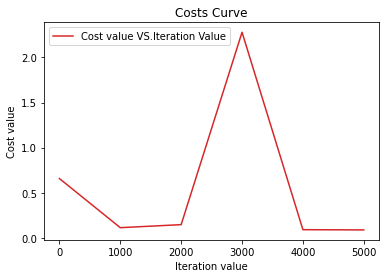

In [19]:

np.random.seed(20)
cifar_en=Enhanced_Shallow_nnlogistic(0.1,10000)

#call to fit function
cifar_en.fit_function(Cifar_Xtrain, Cifar_ytrain,3,3,3)

#making prediction and calulating accuracy over training dataset
Cifar_Train_Value=cifar_en.predict_function(Cifar_Xtrain)
Cifar_Train_Acc = accuracy_score(Cifar_ytrain,Cifar_Train_Value)
print(f"Accuracy on the Training Cifar Dataset :",round((Cifar_Train_Acc)*100,2),"%")

#making prediction and calulating accuracy over validation dataset
Cifar_Validation_Value=cifar_en.predict_function(Cifar_Xvalidation)
Cifar_Validation_Acc = accuracy_score(Cifar_yvalidation,Cifar_Validation_Value)
print(f"Accuracy on the Validation Cifar Dataset :" ,round((Cifar_Validation_Acc)*100,2),"%")

#making prediction and calulating accuracy over testing dataset
Cifar_Test_Value=cifar_en.predict_function(Cifar_Xtest)
Cifar_Test_Acc=accuracy_score(Cifar_Test_Value,Cifar_ytest)
print(f"Accuracy on the Test Cifar Dataset :",round((Cifar_Test_Acc)*100,2),"%")


Cost_Value_Graph(cifar_en.Shallow_Iteration_List,cifar_en.Shallow_loss_list)

# Observation:


1) The cifar dataset's accuracy stays the same as it was in Part 4, however the two datasets' convergences are vastly different.

2) The same accuracies were reached in 5905 iterations after sending Train, Test, and Validation data to the augmented shallow neural network.

3) The enhanced shallow neural network is substantially quicker than the shallow neural network, which takes 7268 iterations. There is no overfitting of data since test data is somewhat less accurate than Train data (by 0.50 percent).

# References:

1. Lecture notes from Prof. Michael Madden Topic 05:Deep Neural Networks, Part 2 (Week 5 slide 7)

2. https://numpy.org/


# Part 5: Deep Learning Enhancements -Vishakha Ratnakar (21238738)

one extra hidden layer and Adam Optimiser

In this section I have implemented Adam Optimizer algorithm which is combination of backprop momemtum and RMSprop algorithm. There are two separate beta values used beta_1 for velocity(V) values and beta_2 for accelearation(S) values that controls the momentum.

1.Initialize values of V and S for every layer weight and bias to 0.
2.After performing backward pass we get the values of delta W and delta v for each layer.

   a.Update the value of V by using backprop momentum formula with beta_1 and S by using RMSprop formula with beta_2 for all layers weights and bias.
   b.The value of V and S are corrected by using formula
   
3.Next comes the gradient descent update step




In [20]:

import warnings
warnings.filterwarnings('ignore')
class Enhanced_Shallow_nnlogistic_adam():
    
    def __init__(self, Learning_Rate=0.01, max_iterations=10000):
        #Initialization: pick values of alpha and max_iter
        self.Learning_Rate = Learning_Rate
        self.max_iterations = max_iterations
        self.iterations = []
        self.cost = []

        self.neuron_h_1 = 0
        self.neuron_h_2 = 0
        self.weight_dict_1={}
        self.bias_dict_1={}
        self.weight_dict_2={}
        self.bias_dict_2={}
        self.weight_dict_3={}
        self.bias_dict_3={}
     
    
    def fit_function(self, X, y,neuron_h_1,neuron_h_2):
        previous_cost = 0
        threshold = 1e-6
        No_of_input = X.shape[1]
        epsilon = 1e-8
        beta = 0.8
        
        #initialize weights value
        self.weight_dict_1['W1'] = np.random.normal(0,0.01, (No_of_input,neuron_h_1))
        self.bias_dict_1['b1'] = np.random.uniform(0, 1, neuron_h_1).reshape(1,neuron_h_1)
        
        self.weight_dict_2['W2'] = np.random.normal(0,0.01, (neuron_h_1, neuron_h_2))
        self.bias_dict_2['b2'] = np.random.uniform(0, 1, neuron_h_1).reshape(1,neuron_h_1)
        
        self.weight_dict_3['W3'] = np.random.normal(0,0.01, (neuron_h_2, 1))
        self.bias_dict_3['b3'] = np.random.uniform(0, 1, 1).reshape(1,1)
        
        #initial values of delS
        delS_del_w1 = 0
        delS_del_w2 = delS_del_w3 = 0
        delS_del_b1 = delS_del_b2 = delS_del_b3 = 0
        
        #initial values of delV
        delV_del_w1 = 0
        delV_del_w2 = delV_del_w3 = 0
        delV_del_b1 = delV_del_b2 = delV_del_b3 = 0
        #==============================================
        
        beta_2 = 0.9
        beta_1 = 0.999
        epsilon = 1e-8
        t= 0
        
        for iteration in range(self.max_iterations):
            #Selecting some random index to be fetched from training dataset for training weights
            random_index = np.random.randint(X.shape[0])

            # Fetching the observations of that random index.
            X_row = X[random_index].reshape(X.shape[1], 1)
            y_row = y[random_index]
            
            #call to forwardpass
            s_h1_layer,a_h1_layer,s_h2_layer,a_h2_layer,s_h3_layer,a_h3_layer = self.forward_pass(X_row)

            #Calculating the cost function
            current_cost = -(y_row * np.log(a_h3_layer) + (1 - y_row) * np.log(1 - a_h3_layer)) 
           
            
            #Checking if the difference is under the expected threshold so that the convergence could be checked.
            if abs(float(current_cost - previous_cost)) <= threshold:
                print(f'The  Convergence reached at iteration:\t{iteration}')
                print(f'The Cost value for Convergence:\t{current_cost}')
                convergence_val = True
                break
            
            if iteration % 1000 == 0:
                self.iterations.append(iteration)
                self.cost.append(current_cost)
            
            previous_cost = current_cost
            
            #call to backward pass
            del_w1_layer,del_b1_layer,del_w2_layer,del_b2_layer,del_w3_layer,del_b3_layer = self.backward_pass(s_h1_layer,a_h1_layer,s_h2_layer,s_h2_layer,s_h3_layer,a_h3_layer,random_index,X_row,y_row)
           
            #============================================================================================================
            #Calculating delS values of all weights and bias
            #============================================================================================================
            t += 1
            
            delS_del_w1 = (1-beta_2)*(del_w1_layer**2) + beta_2*delS_del_w1
            delS_del_w2 = (1-beta_2)*(del_w2_layer**2) + beta_2*delS_del_w2
            delS_del_w3 = (1-beta_2)*(del_w3_layer**2) + beta_2*delS_del_w3

            delS_del_b1 = (1-beta_2)*(del_b1_layer**2) + beta_2*delS_del_b1
            delS_del_b2 = (1-beta_2)*(del_b2_layer**2) + beta_2*delS_del_b2
            delS_del_b3 = (1-beta_2)*(del_b3_layer**2) + beta_2*delS_del_b3
            
            #====================================================================================
            #Correcting the delS values
            #=====================================================================================
            
            delS_C_w1 = delS_del_w1/(1-(beta_2**t))
            delS_C_w2 = delS_del_w2/(1-(beta_2**t))
            delS_C_w3 = delS_del_w3/(1-(beta_2**t))
            
            delS_C_b1 = delS_del_b1/(1-(beta_2**t))
            delS_C_b2 = delS_del_b2/(1-(beta_2**t))
            delS_C_b3 = delS_del_b3/(1-(beta_2**t))
            
            #======================================================================================
            #Calculating delV values of all weights and bias
            #==================================================================================
            
            delV_del_w1 = (1-beta_1)*(del_w1_layer) + beta_1*delV_del_w1
            delV_del_w2 = (1-beta_1)*(del_w2_layer) + beta_1*delV_del_w2
            delV_del_w3 = (1-beta_1)*(del_w3_layer) + beta_1*delV_del_w3
            
            delV_del_b1 = (1-beta_1)*(del_b1_layer) + beta_1*delV_del_b1
            delV_del_b2 = (1-beta_1)*(del_b2_layer) + beta_1*delV_del_b2
            delV_del_b3 = (1-beta_1)*(del_b3_layer) + beta_1*delV_del_b3
            
            #====================================================================================
            #Correcting the delS values
            #===================================================================================
            
            delV_C_w1 = delV_del_w1/(1-(beta_1**t))
            delV_C_w2 = delV_del_w2/(1-(beta_1**t))
            delV_C_w3 = delV_del_w3/(1-(beta_1**t))
            
            delV_C_b1 = delV_del_b1/(1-(beta_1**t))
            delV_C_b2 = delV_del_b2/(1-(beta_1**t))
            delV_C_b3 = delV_del_b3/(1-(beta_1**t))
            
            #==============================================================================
            #Gradient descent step
            #==============================================================================
            update_w1 = delV_C_w1/(np.sqrt(delS_C_w1)+epsilon)
            update_w2 = delV_C_w2/(np.sqrt(delS_C_w2)+epsilon)
            update_w3 = delV_C_w3/(np.sqrt(delS_C_w3)+epsilon)
            
            update_b1 = delV_C_b1/(np.sqrt(delS_C_b1)+epsilon)
            update_b2 = delV_C_b2/(np.sqrt(delS_C_b2)+epsilon)
            update_b3 = delV_C_b3/(np.sqrt(delS_C_b3)+epsilon)
            
            #Gradient Descent Stage
            self.weight_dict_1['W1'] -= self.Learning_Rate * update_w1.T
            self.weight_dict_2['W2'] -= self.Learning_Rate * update_w2.T
            self.weight_dict_3['W3'] -= self.Learning_Rate * update_w3.T
            
            self.bias_dict_1['b1'] -= self.Learning_Rate * update_b1
            self.bias_dict_2['b2'] -= self.Learning_Rate * update_b2
            self.bias_dict_3['b3'] -= self.Learning_Rate * update_b3      
                
    #forward pass
    def forward_pass(self,X_row):
        
        #Forward Propagation Step - Hidden layer 1
        s_h1_layer = X_row.T.dot(self.weight_dict_1['W1']) + self.bias_dict_1['b1']
        a_h1_layer = self.sigmoid(s_h1_layer)
            
        #hidden layer 2
        s_h2_layer = a_h1_layer.dot(self.weight_dict_2['W2']) + self.bias_dict_2['b2']
        a_h2_layer = self.sigmoid(s_h2_layer)
        
        #Hidden Layer 3
        s_h3_layer = a_h2_layer.dot(self.weight_dict_3['W3']) + self.bias_dict_3['b3']
        a_h3_layer = self.sigmoid(s_h3_layer)
            
        return s_h1_layer,a_h1_layer,s_h2_layer,a_h2_layer,s_h3_layer,a_h3_layer
    
    #backward pass
    def backward_pass(self,s_h1_layer,a_h1_layer,s_h2_layer,a_h2_layer,s_h3_layer,a_h3_layer,random_index,X_row,y_row):
        
        #Backward Propagation Step
        
        #layer 3
        del_z3_layer = a_h3_layer - y_row
        del_w3_layer = (del_z3_layer * a_h2_layer) 
        del_b3_layer = del_z3_layer
            
        #Layer 2
            
        sigmoid_derivative_2 = self.sigmoid(s_h2_layer).dot((1-self.sigmoid(s_h2_layer)).T)
        
        del_z2_layer = sigmoid_derivative_2 * del_z3_layer.dot(self.weight_dict_3['W3'].T)
        del_w2_layer = del_z2_layer.dot(a_h1_layer.T) 
        del_b2_layer = del_z2_layer
        
        #Layer 3
        
        sigmoid_derivative_1 = self.sigmoid(s_h1_layer).dot((1-self.sigmoid(s_h1_layer)).T)
        
        del_z1_layer = sigmoid_derivative_1 * del_z2_layer.dot(self.weight_dict_2['W2'].T)
        del_w1_layer = del_z1_layer.T.dot(X_row.T) 
        del_b1_layer = del_z1_layer
        
        return del_w1_layer,del_b1_layer,del_w2_layer,del_b2_layer,del_w3_layer,del_b3_layer

    #predict
    def predict_function(self, pred_value):
        
        m=len(pred_value)
        
        w1_sum = np.dot(pred_value ,self.weight_dict_1['W1']) + self.bias_dict_1['b1']
        h1_act = self.sigmoid(w1_sum)
        
        w2_sum = np.dot(h1_act, self.weight_dict_2['W2']) + self.bias_dict_2['b2']
        h2_act = self.sigmoid(w2_sum)
        
        w3_sum = np.dot(h2_act, self.weight_dict_3['W3']) + self.bias_dict_3['b3']
        sigmoid_prediction = self.sigmoid(w3_sum)
        
        
        y_pred = [None] * m          
        for i in range(len(sigmoid_prediction)):
            if sigmoid_prediction[i] > 0.5:
                y_pred[i] = 1
            else: 
                y_pred[i] = 0
                
        return y_pred
    
    def sigmoid(self, formula):
        return 1 / (1 + np.exp(-formula))
    

In [21]:

np.random.seed(20)
cifar_var=Enhanced_Shallow_nnlogistic_adam(0.01,10000)

#call to fit function
cifar_var.fit_function(Cifar_Xtrain, Cifar_ytrain,3,3)

#making prediction and calulating accuracy over training dataset
Cifar_Train_Value=cifar_var.predict_function(Cifar_Xtrain)
Cifar_Train_Acc = accuracy_score(Cifar_ytrain,Cifar_Train_Value)
print(f"Accuracy on the Training Cifar Dataset :",round((Cifar_Train_Acc)*100,2),"%")

#making prediction and calulating accuracy over validation dataset
Cifar_Validation_Value=cifar_var.predict_function(Cifar_Xvalidation)
Cifar_Validation_Acc = accuracy_score(Cifar_yvalidation,Cifar_Validation_Value)
print(f"Accuracy on the Validation Cifar Dataset :" ,round((Cifar_Validation_Acc)*100,2),"%")

#making prediction and calulating accuracy over testing dataset
Cifar_Test_Value=cifar_var.predict_function(Cifar_Xtest)
Cifar_Test_Acc=accuracy_score(Cifar_Test_Value,Cifar_ytest)
print(f"Accuracy on the Test Cifar Dataset :",round((Cifar_Test_Acc)*100,2),"%")


The  Convergence reached at iteration:	219
The Cost value for Convergence:	[[0.09131371]]
Accuracy on the Training Cifar Dataset : 89.83 %
Accuracy on the Validation Cifar Dataset : 86.87 %
Accuracy on the Test Cifar Dataset : 89.23 %


# Observation

The accuracy of the cifar dataset remains the same as it was in Part 4, but the convergences of the two datasets are significantly different. Part 4 shows that the model converges at 7268th iteration, but part 5 shows that the model converges at 219th iteration using one extra layer and an adam optimizer. This demonstrates that the Adam optimizer outperforms the traditional stochastic gradient descent algorithm. We can also see the cost value difference between the two models. The cost of convergence for a shallow neural net with one hidden layer is 0.17, while the cost of convergence for an improved model is 0.09. 

# Reference
Lecture notes from Prof. Michael Madden -Topic 05: Deep Neural Networks, Part 2